In [55]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.414501,-1.107827,3.708366,0.382873,1.268639,0
1,-1.907113,-1.564938,-0.471862,0.667709,0.710447,1
2,-1.914414,-0.633095,-0.679980,-1.595977,0.693640,1
3,-3.552237,-3.404098,-2.617619,2.429828,0.015904,1
4,-1.532885,-2.755144,-0.847322,-1.712050,-1.180876,0


In [8]:
# function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [56]:
# function  for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [7]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

## Row Sampling

In [67]:
df1 = sample_rows(df,0.25)
df1.head()

,col1,col2,col3,col4,col5,target
73,-2.876134,-1.887030,0.589670,-1.593451,0.758531,1
77,-2.531916,-1.808666,-1.883239,-0.705904,0.070032,1
76,-1.995843,-2.550649,-0.576016,-1.444270,-1.062906,0
59,-0.299967,0.120686,-1.245484,-0.507549,1.217698,1
29,-3.760521,-1.568553,-1.974920,-2.670838,-0.248693,1


In [68]:
df2 = sample_rows(df,0.25)
df2.head()

,col1,col2,col3,col4,col5,target
59,-0.299967,0.120686,-1.245484,-0.507549,1.217698,1
46,-2.888283,1.053173,-0.035682,-0.085946,3.988142,0
39,-5.139681,-4.589762,-1.076093,-0.137235,0.569858,1
33,1.551922,-0.351671,2.000388,-2.933780,1.096007,0
0,0.414501,-1.107827,3.708366,0.382873,1.268639,0


In [69]:
df3 = sample_rows(df,0.25)
df3.head()

,col1,col2,col3,col4,col5,target
41,1.308615,-2.759519,0.540462,-1.589492,-0.502915,0
2,-1.914414,-0.633095,-0.679980,-1.595977,0.693640,1
22,-3.622252,-0.178648,1.074563,-1.153442,0.796793,0
10,0.524940,-1.583469,-2.155453,5.822601,1.429346,1
62,-1.526302,-1.339062,1.700393,-0.224156,0.581287,0


In [70]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(25, 6)
(25, 6)
(25, 6)


In [71]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [72]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [73]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'X[2] <= -0.654\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.25, 0.7, 'X[0] <= 0.038\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.7, 'X[3] <= 0.413\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.625, 0.5, 'X[3] <= -1.519\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.5, 0.3, 'X[3] <= -1.826\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

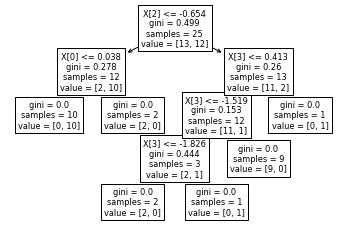

In [74]:
plot_tree(clf1)

[Text(0.5, 0.8333333333333334, 'X[2] <= -0.652\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.25, 0.5, 'X[4] <= 0.268\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.75, 0.5, 'X[1] <= 1.085\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

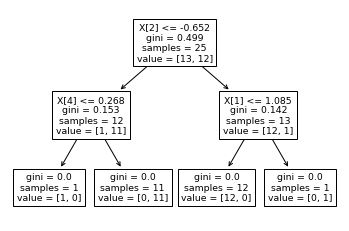

In [75]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.875, 'X[3] <= 0.178\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.5, 0.625, 'X[2] <= -0.628\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.3333333333333333, 0.375, 'X[3] <= -1.654\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

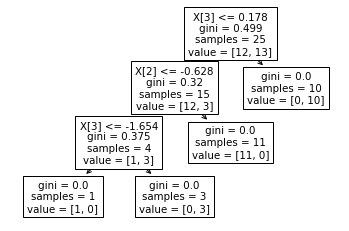

In [76]:
plot_tree(clf3)

In [77]:
clf1.predict(np.array([-3.514859, -3.025125, 0.085264, 0.451856, 0.326464]).reshape(1,5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [78]:
clf2.predict(np.array([-3.514859, -3.025125, 0.085264, 0.451856, 0.326464]).reshape(1,5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [79]:
clf3.predict(np.array([-3.514859, -3.025125, 0.085264, 0.451856, 0.326464]).reshape(1,5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Column Sampling

In [80]:
df1 = sample_features(df,0.5)
df1.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_12132\1796190113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col3,target
0,0.382873,3.708366,0
1,0.667709,-0.471862,1
2,-1.595977,-0.679980,1
3,2.429828,-2.617619,1
4,-1.712050,-0.847322,0


In [81]:
df2 = sample_features(df,0.5)
df2.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_12132\1796190113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col2,target
0,0.414501,-1.107827,0
1,-1.907113,-1.564938,1
2,-1.914414,-0.633095,1
3,-3.552237,-3.404098,1
4,-1.532885,-2.755144,0


In [82]:
df3 = sample_features(df,0.5)
df3.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_12132\1796190113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col5,col1,target
0,1.268639,0.414501,0
1,0.710447,-1.907113,1
2,0.693640,-1.914414,1
3,0.015904,-3.552237,1
4,-1.180876,-1.532885,0


In [83]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col3', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [85]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.41304347826086957, 0.9375, 'X[1] <= -0.652\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.17391304347826086, 0.8125, 'X[0] <= -1.654\ngini = 0.145\nsamples = 38\nvalue = [3, 35]'),
 Text(0.08695652173913043, 0.6875, 'X[1] <= -1.411\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.043478260869565216, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13043478260869565, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2608695652173913, 0.6875, 'X[0] <= 0.232\ngini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.21739130434782608, 0.5625, 'X[0] <= 0.109\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.17391304347826086, 0.4375, 'X[0] <= -0.47\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.13043478260869565, 0.3125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.21739130434782608, 0.3125, 'X[0] <= -0.392\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.17391304347826086, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 

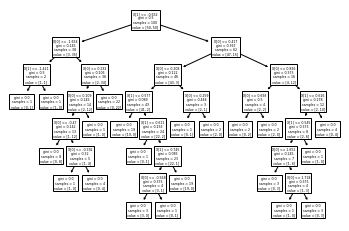

In [86]:
plot_tree(clf1)

[Text(0.6428571428571429, 0.9705882352941176, 'X[0] <= -3.655\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5952380952380952, 0.9117647058823529, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6904761904761905, 0.9117647058823529, 'X[0] <= 0.293\ngini = 0.498\nsamples = 94\nvalue = [50, 44]'),
 Text(0.47619047619047616, 0.8529411764705882, 'X[1] <= 0.338\ngini = 0.5\nsamples = 80\nvalue = [39, 41]'),
 Text(0.42857142857142855, 0.7941176470588235, 'X[1] <= -1.097\ngini = 0.496\nsamples = 75\nvalue = [34, 41]'),
 Text(0.23809523809523808, 0.7352941176470589, 'X[0] <= -2.297\ngini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(0.14285714285714285, 0.6764705882352942, 'X[0] <= -2.908\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.09523809523809523, 0.6176470588235294, 'X[1] <= -2.715\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.047619047619047616, 0.5588235294117647, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.14285714285714285, 0.5588235294117647,

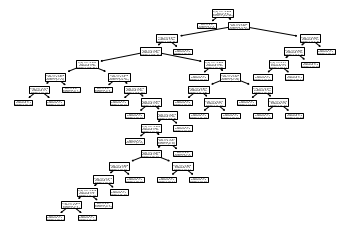

In [87]:
plot_tree(clf2)

[Text(0.625, 0.9642857142857143, 'X[0] <= -0.887\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5905172413793104, 0.8928571428571429, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6594827586206896, 0.8928571428571429, 'X[1] <= 0.293\ngini = 0.497\nsamples = 93\nvalue = [43, 50]'),
 Text(0.4224137931034483, 0.8214285714285714, 'X[0] <= 2.724\ngini = 0.485\nsamples = 80\nvalue = [33, 47]'),
 Text(0.3879310344827586, 0.75, 'X[1] <= -3.655\ngini = 0.463\nsamples = 74\nvalue = [27, 47]'),
 Text(0.35344827586206895, 0.6785714285714286, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4224137931034483, 0.6785714285714286, 'X[0] <= 0.397\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(0.3103448275862069, 0.6071428571428571, 'X[0] <= 0.333\ngini = 0.496\nsamples = 22\nvalue = [12, 10]'),
 Text(0.27586206896551724, 0.5357142857142857, 'X[0] <= 0.266\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(0.2413793103448276, 0.4642857142857143, 'X[0] <= 0.184\ngini = 0.498\

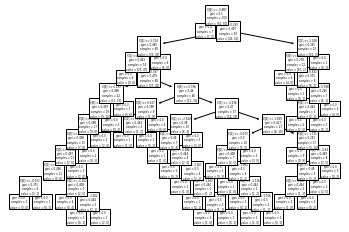

In [88]:
plot_tree(clf3)

In [95]:
clf1.predict(np.array([-1.907113, -1.564938]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [96]:
clf2.predict(np.array([-1.907113, -1.564938]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [97]:
clf3.predict(np.array([-1.907113, -1.564938]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## Combined sampling(Row+Column)

In [100]:
df1 = combined_sampling(df,0.5,0.5)
df1.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_12132\1796190113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col3,target
70,-1.972051,1.927467,0
10,5.822601,-2.155453,1
88,2.250194,-1.050677,1
96,0.169773,1.020410,0
51,-0.351163,-1.101017,1


In [101]:
df2 = combined_sampling(df,0.5,0.5)
df2.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_12132\1796190113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col5,target
53,-3.110792,3.355840,0
82,-3.461465,-0.315023,0
4,-1.532885,-1.180876,0
73,-2.876134,0.758531,1
56,-0.360648,0.989675,0


In [106]:
df3 = combined_sampling(df,0.5,0.5)
df3.head()

C:\Users\Noel\AppData\Local\Temp\ipykernel_12132\1796190113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col3,target
13,-2.296106,0.003222,0
38,-0.079859,-0.514156,1
7,-2.100251,0.632585,0
59,-0.299967,-1.245484,1
50,-4.788781,-2.359926,1


In [107]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col3', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')
Index(['col1', 'col3', 'target'], dtype='object')


In [108]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5454545454545454, 0.9166666666666666, 'X[1] <= -0.318\ngini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.2727272727272727, 0.75, 'X[0] <= 0.232\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[0] <= -0.185\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[0] <= -0.138\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.18181818181818182, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.25, 'X[0] <= 0.008\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45454545454545453, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.5833333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.8181818181818182, 0.75, 'X[0] <= 

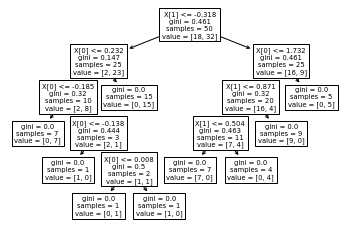

In [109]:
plot_tree(clf1)

[Text(0.5454545454545454, 0.9166666666666666, 'X[1] <= -0.318\ngini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.2727272727272727, 0.75, 'X[0] <= 0.232\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[0] <= -0.185\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[0] <= -0.138\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.18181818181818182, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.25, 'X[0] <= 0.008\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45454545454545453, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.5833333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.8181818181818182, 0.75, 'X[0] <= 

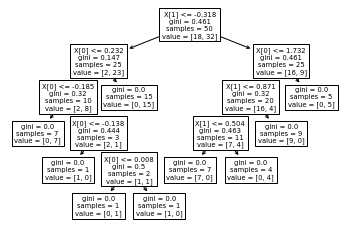

In [110]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.9375, 'X[1] <= 2.445\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.5555555555555556, 0.8125, 'X[0] <= -0.933\ngini = 0.495\nsamples = 42\nvalue = [23, 19]'),
 Text(0.3333333333333333, 0.6875, 'X[1] <= -0.101\ngini = 0.476\nsamples = 23\nvalue = [9, 14]'),
 Text(0.2222222222222222, 0.5625, 'X[0] <= -4.357\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.1111111111111111, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4375, 'X[0] <= -1.067\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.2222222222222222, 0.3125, 'X[0] <= -2.566\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.1111111111111111, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3333333333333333, 0.1875, 'X[1] <= -0.992\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.0625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4444444444444444, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.

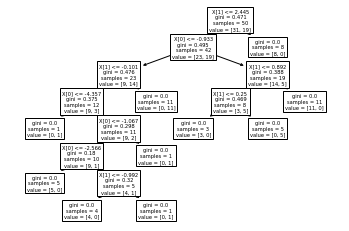

In [111]:
plot_tree(clf2)

[Text(0.5, 0.9285714285714286, 'X[1] <= -0.377\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.3, 0.7857142857142857, 'X[0] <= 0.268\ngini = 0.355\nsamples = 26\nvalue = [6, 20]'),
 Text(0.2, 0.6428571428571429, 'X[1] <= -0.9\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.3, 0.5, 'X[1] <= -0.545\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.35714285714285715, 'X[0] <= -3.378\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.7857142857142857, 'X[0] <= 1.381\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.6, 0.6428571428571429, 'X[0] <= -0.632\ngini = 0.227\nsamples = 23\nvalue = [2

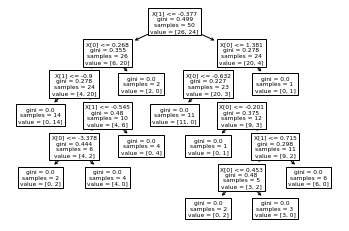

In [112]:
plot_tree(clf3)

In [113]:
clf1.predict(np.array([-2.296106, 0.003222]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [114]:
clf2.predict(np.array([-2.296106, 0.003222]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [115]:
clf3.predict(np.array([-2.296106, 0.003222]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])